In [11]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Flatten, Concatenate, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.utils import plot_model

In [12]:
input_seq = Input(shape=(20,))
input_image = Input(shape=(30, 30, 3))


x1 = Embedding(1000, 256)(input_seq)
x1 = SimpleRNN(128)(x1)
x1 = Dense(128)(x1)

x2 = Conv2D(64, (7, 7))(input_image)
x2 = MaxPool2D()(x2)
x2 = Conv2D(128, (5, 5))(x2)
x2 = MaxPool2D()(x2)
x2 = Conv2D(256, (3, 3))(x2)
x2 = MaxPool2D()(x2)
x2 = Flatten()(x2)
x2 = Dense(128)(x2)

x3 = Concatenate()([x1, x2])
x3 = Dense(128)(x3)
outputs = Dense(1000)(x3)

model = Model(inputs=[input_image, input_seq], outputs=outputs)

In [13]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 30, 30, 3)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 24, 24, 64)   9472        ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 12, 12, 64)  0           ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 8, 8, 128)    204928      ['max_pooling2d_9[0][0]']        
                                                                                            

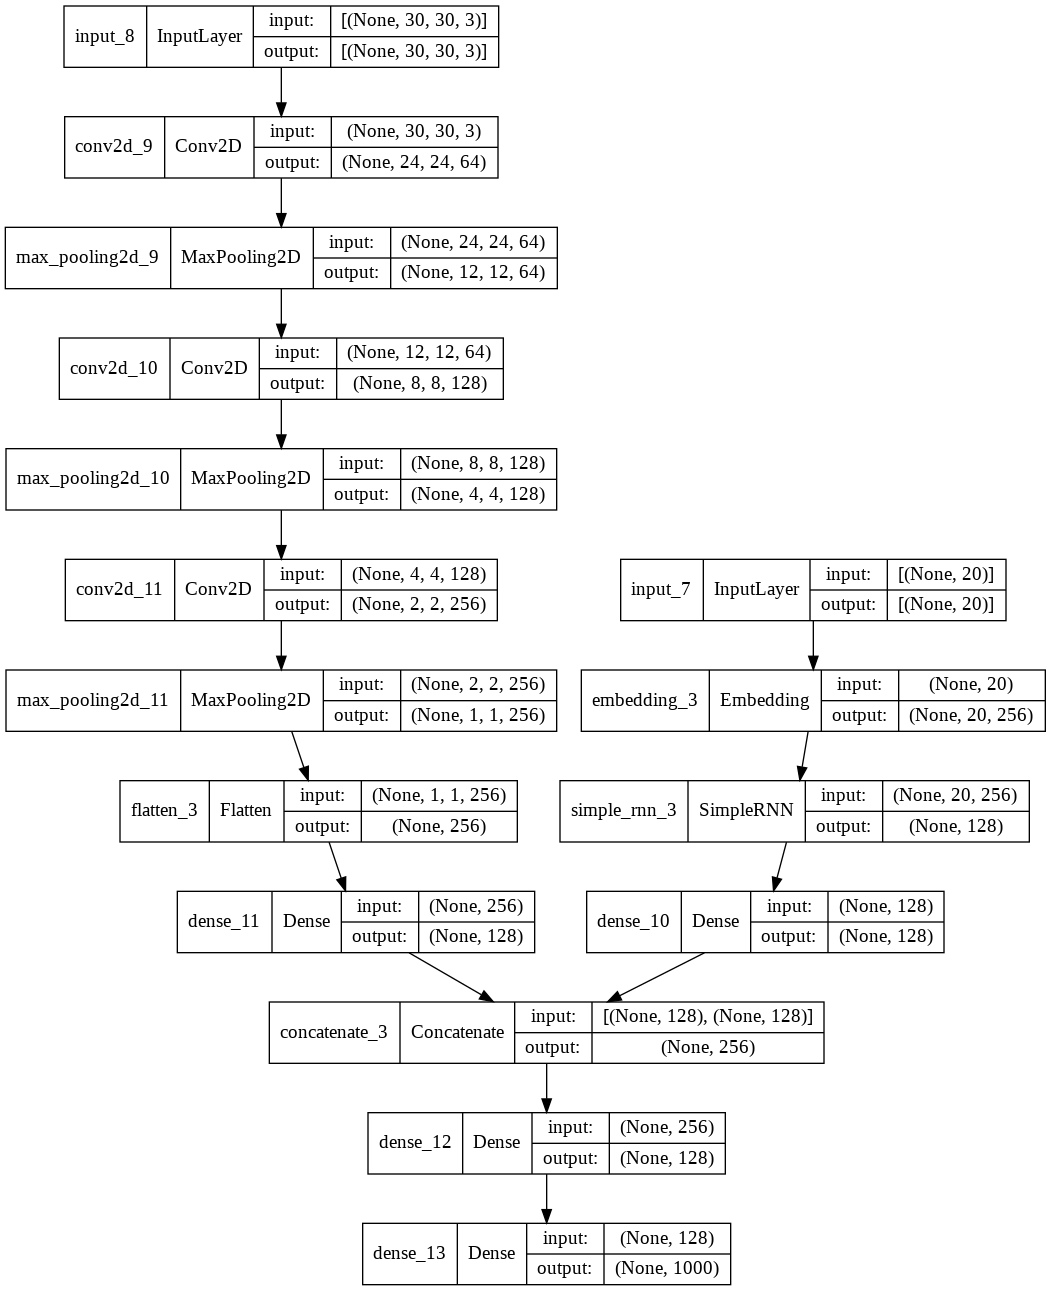

In [14]:
plot_model(
  model,
  to_file="./model_structure.png",
  show_shapes=True,
  show_layer_names=True,
)